In [1]:
pwd

'/Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code/5_across_task_mixed_batch_trait_beh_corr'

In [2]:
path_to_add = os.path.abspath('../')
print('path_to_add:',path_to_add)
sys.path.append(path_to_add)
from func_curvefit import r_squared
from general_utility_functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy import stats

path_to_add: /Users/f0053cz/Dartmouth College Dropbox/Rekha Sreekumar Varrier/postdoc_Dartmouth/psyanim_behav_paper/version2/scripts_data_for_beh_paper/code


In [4]:
s=16 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

In [9]:
df = pd.read_csv(f'../../data/subtlety_playfight_data/curvefit_traits_merged_linearpf_onlyneccols.csv',index_col=[0])
print(df.shape)
df.head()

(276, 22)


,subID,PSE_subt,range_subt,bias_subt,sigma_subt,PSE_pf,slope_pf,bias_pf,social_skill,attn_switch,...,comm,posAffect,negAffect,neuroticism,extraversion,openness,agreeableness,conscientiousness,loneliness,nfriends
0,30002.0,0.552951,0.900821,0.315504,0.103360,0.486946,0.784286,0.547461,21.0,23.0,...,16.000000,20.0,0.0,38.0,28.000000,31.000000,34.0,39.0,56.0,3.0
1,30004.0,0.276896,0.805834,0.999458,0.076866,0.127093,0.469286,0.829744,21.0,20.0,...,15.000000,25.0,11.0,38.0,26.181818,50.000000,50.0,46.0,56.0,3.0
2,30005.0,0.320583,0.710131,0.861730,0.115353,0.498304,0.842143,0.509050,17.0,29.0,...,16.000000,20.0,21.0,51.0,39.000000,40.000000,43.0,19.0,41.0,5.0
3,30006.0,0.464823,0.989396,0.889572,0.079221,0.260263,0.725000,1.000000,8.0,10.0,...,3.000000,25.0,0.0,18.0,41.000000,31.000000,44.0,57.0,30.0,4.0
4,30008.0,0.325118,0.582252,0.692710,0.172585,0.322409,0.511071,0.685634,5.0,15.0,...,12.222222,28.0,4.0,27.0,46.000000,42.545455,46.0,50.0,45.0,5.0


In [10]:
relevant_traits = ['social_skill','comm','loneliness','posAffect','extraversion','neuroticism']
new_terms_subt = ['PSE','range','bias','sigma']
# new_terms_subt = [i+'_subt' for i in new_terms_subt]
new_terms_pf= ['PSE','slope','bias']
# new_terms_pf = [i+'_pf' for i in new_terms_pf]
req_cols = ['subID'] + relevant_traits + [i + '_subt' for i in new_terms_subt] + [i + '_pf' for i in new_terms_pf] 
req_cols

['subID',
 'social_skill',
 'comm',
 'loneliness',
 'posAffect',
 'extraversion',
 'neuroticism',
 'PSE_subt',
 'range_subt',
 'bias_subt',
 'sigma_subt',
 'PSE_pf',
 'slope_pf',
 'bias_pf']

In [11]:
df = df[req_cols]
df

,subID,social_skill,comm,loneliness,posAffect,extraversion,neuroticism,PSE_subt,range_subt,bias_subt,sigma_subt,PSE_pf,slope_pf,bias_pf
0,30002.0,21.0,16.000000,56.0,20.0,28.000000,38.0,0.552951,0.900821,0.315504,0.103360,0.486946,0.784286,0.547461
1,30004.0,21.0,15.000000,56.0,25.0,26.181818,38.0,0.276896,0.805834,0.999458,0.076866,0.127093,0.469286,0.829744
2,30005.0,17.0,16.000000,41.0,20.0,39.000000,51.0,0.320583,0.710131,0.861730,0.115353,0.498304,0.842143,0.509050
3,30006.0,8.0,3.000000,30.0,25.0,41.000000,18.0,0.464823,0.989396,0.889572,0.079221,0.260263,0.725000,1.000000
4,30008.0,5.0,12.222222,45.0,28.0,46.000000,27.0,0.325118,0.582252,0.692710,0.172585,0.322409,0.511071,0.685634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,30344.0,27.0,16.000000,41.0,14.0,29.000000,25.0,0.361233,0.655715,0.794480,0.135840,0.507141,0.566786,0.490657
272,30345.0,15.0,5.000000,72.0,15.0,23.000000,36.0,0.475067,0.833333,1.000000,0.013915,0.346911,0.929429,1.000000
273,30346.0,16.0,8.000000,56.0,27.0,36.000000,49.0,0.426850,0.999914,0.961644,0.045409,0.587496,0.786429,0.177815
274,30348.0,8.0,2.000000,24.0,27.0,42.000000,18.0,0.729328,0.200238,0.444049,0.392303,0.531699,0.480714,0.470656


In [12]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(276, 14)
(276, 14)


In [13]:
df = df.loc[df['slope_pf'] > 0,:]
df.shape

(275, 14)

In [14]:
rows = (df['PSE_pf'] <= 1) & (df['PSE_pf'] >= 0) & (df['PSE_subt'] <= 1) & (df['PSE_subt'] >= 0)
df.loc[rows,:].shape

(275, 14)

In [15]:
subt_col_labels = ['PSE_subt', 'range_subt', 'bias_subt','sigma_subt']
pf_col_labels = ['PSE_pf','slope_pf','bias_pf']

In [16]:
cmap = 'BrBG'#'RdBu_r'

([<matplotlib.axis.YTick at 0x7f91b0be3d90>,
 [Text(0, 0.5, 'PSE_subt'),
  Text(0, 1.5, 'range_subt'),
  Text(0, 2.5, 'bias_subt'),
  Text(0, 3.5, 'sigma_subt')])

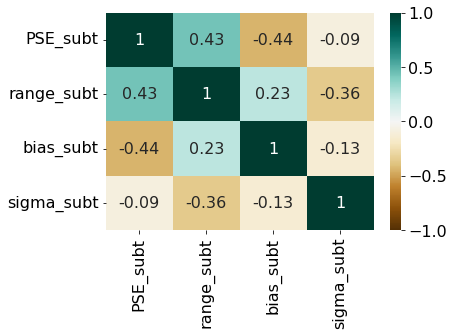

In [17]:
r_all = np.full((len(subt_col_labels),len(subt_col_labels)),np.nan)
p_all = np.full((len(subt_col_labels),len(subt_col_labels)),np.nan)
for i,row1 in enumerate(subt_col_labels):
    # row1 = row1 + '_subt'
    for j,row2 in enumerate(subt_col_labels):
        # row2 = row2 + '_pf'
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = pearsonr(x,y)

sns.heatmap(r_all,cmap=cmap,annot=True,vmin=-1,vmax=1)
plt.xticks(np.arange(len(subt_col_labels))+.5,subt_col_labels, rotation=90)
plt.yticks(np.arange(len(subt_col_labels))+.5,subt_col_labels, rotation=0)

([<matplotlib.axis.YTick at 0x7f91f8d35250>,
 [Text(0, 0.5, 'PSE_pf'), Text(0, 1.5, 'slope_pf'), Text(0, 2.5, 'bias_pf')])

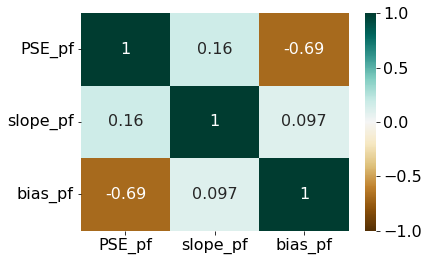

In [18]:
r_all = np.full((len(pf_col_labels),len(pf_col_labels)),np.nan)
p_all = np.full((len(pf_col_labels),len(pf_col_labels)),np.nan)
for i,row1 in enumerate(pf_col_labels):
    for j,row2 in enumerate(pf_col_labels):
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = pearsonr(x,y)

sns.heatmap(r_all,cmap=cmap,annot=True,vmin=-1,vmax=1)
plt.xticks(np.arange(len(pf_col_labels))+.5,pf_col_labels)
plt.yticks(np.arange(len(pf_col_labels))+.5,pf_col_labels, rotation=0)

# Subtlety vs. playfight

In [19]:
r_all = np.full((len(subt_col_labels),len(pf_col_labels)),np.nan)
p_all = np.full((len(subt_col_labels),len(pf_col_labels)),np.nan)
for i,row1 in enumerate(subt_col_labels):
    # row1 = row1 + '_subt'
    for j,row2 in enumerate(pf_col_labels):
        # row2 = row2 + '_pf'a
        x = df[row1]
        y = df[row2]
        rows = ~(np.isnan(x)) & ~(np.isnan(y)) & ~(np.isinf(x)) & ~(np.isinf(y))
        x = x[rows]
        y = y[rows]
        r_all[i,j], p_all[i,j] = stats.pearsonr(x,y)

from multipy.fdr import lsu

# Flatten the 2D array to 1D
p_all_flattened = p_all.flatten()

# Apply the lsu correction
corrected_p_values_flattened = lsu(p_all_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values = corrected_p_values_flattened.reshape(p_all.shape)

print(corrected_p_values)

[[False False False]
 [False  True False]
 [False  True False]
 [False  True False]]


In [20]:
cmap = 'BrBG'#'RdBu_r'

In [21]:
results_loc = '../../results/subtlety_playfight_mixed/'

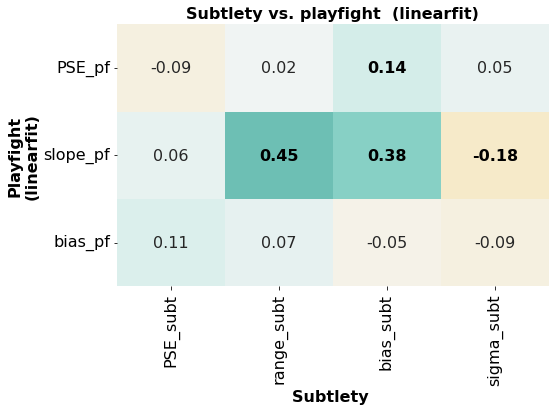

In [22]:
fig,ax = plt.subplots(nrows=1,ncols = 1, figsize=(2*len(subt_col_labels),2*len(pf_col_labels)))
# ax = axs[0]
sns.heatmap(r_all.T,vmin=-1,vmax=1,annot=True,cbar=False,cmap=cmap,ax=ax,fmt='.2f')
# ax.set_title('subtlety',fontweight='bold')
ax.set_xticklabels(subt_col_labels, rotation=90, fontsize=16)
ax.set_yticklabels(pf_col_labels, rotation=0, fontsize=16)
ax.set_title('Subtlety vs. playfight  (linearfit)',fontweight='bold', fontsize=16)
ax.set_xlabel('Subtlety ',fontweight='bold', fontsize=16)
ax.set_ylabel('Playfight\n(linearfit)',fontweight='bold', fontsize=16)

# Specify cells to be bolded (example: first row and first column)
rows, cols = np.where(p_all<.05)
true_indices = list(zip(rows, cols))
for (j,i) in true_indices:
    ax.texts[i*r_all.shape[0] + j].set_weight('bold')
    ax.texts[i*r_all.shape[0] + j].set_color('k')

plt.tight_layout()
plt.savefig(f'{results_loc}/across_task_unc.png', dpi=300, bbox_inches='tight')

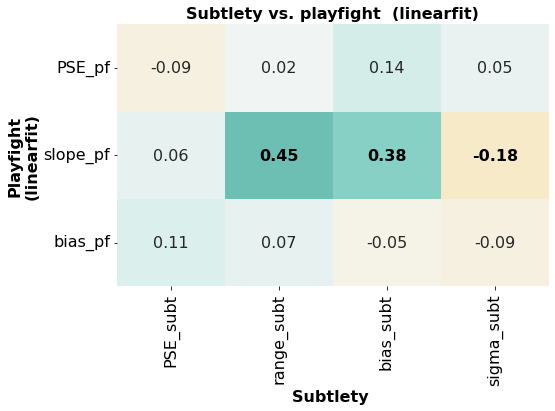

In [24]:
fig,ax = plt.subplots(nrows=1,ncols = 1, figsize=(2*len(subt_col_labels),2*len(pf_col_labels)))
# ax = axs[0]
sns.heatmap(r_all.T,vmin=-1,vmax=1,annot=True,cbar=False,cmap=cmap,ax=ax,fmt='.2f')
# ax.set_title('subtlety',fontweight='bold')
ax.set_xticklabels(subt_col_labels, rotation=90, fontsize=16)
ax.set_yticklabels(pf_col_labels, rotation=0, fontsize=16)
ax.set_title('Subtlety vs. playfight  (linearfit)',fontweight='bold', fontsize=16)
ax.set_xlabel('Subtlety ',fontweight='bold', fontsize=16)
ax.set_ylabel('Playfight\n(linearfit)',fontweight='bold', fontsize=16)

# Specify cells to be bolded (example: first row and first column)
rows, cols = np.where(corrected_p_values)
true_indices = list(zip(rows, cols))
for (j,i) in true_indices:
    ax.texts[i*r_all.shape[0] + j].set_weight('bold')
    ax.texts[i*r_all.shape[0] + j].set_color('k')

plt.tight_layout()
plt.savefig(f'{results_loc}/across_task_FDRcorr.png', dpi=300, bbox_inches='tight')

In [28]:
# def explore_correlations(df, xcol,ycol,ax,col):

#     sns.regplot(data=df,x=xcol,y=ycol,ax=ax,marker = '.', color=col)
#     x,y = df[xcol], df[ycol]
#     rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
#     x = x[rows]
#     y = y[rows]
#     x = x[rows]
#     y = y[rows]
#     r,p = pearsonr(x,y)
#     if p < .05:
#         color = 'k'
#         fontweight = 'bold'
#     else:
#         color = 'k'
#         fontweight = 'normal'
#     ax.annotate(f'r_p={r:.2f} ({get_p(p)})',xy=(0.05,.2),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')

#     r,p = spearmanr(x,y)
#     if p < .05:
#         color = 'k'
#         fontweight = 'bold'
#     else:
#         color = 'k'
#         fontweight = 'normal'
#     ax.annotate(f'r_s={r:.2f} ({get_p(p)})',xy=(0.05,.1),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')


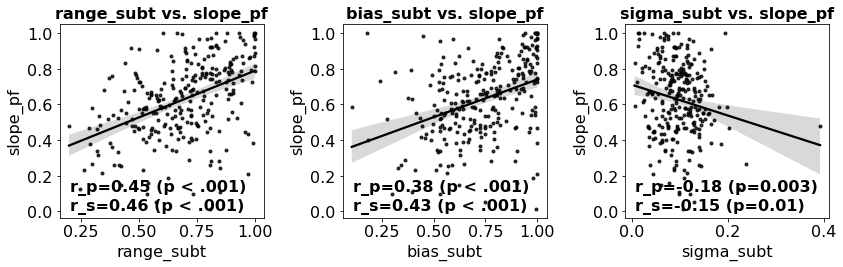

In [29]:
cols = [['range_subt','slope_pf'],['bias_subt','slope_pf'],['sigma_subt','slope_pf']] # 3
cols = np.array(cols)
fig,axs = plt.subplots(figsize=(4*cols.shape[0],4),nrows=1,ncols=cols.shape[0], sharey=False)

for i in range(len(cols)):
    xcol,ycol = cols[i]
    ax = axs[i]
    explore_correlations(df, xcol,ycol,ax,'k')
    ax.set_title(f'{xcol} vs. {ycol}',fontweight='bold')
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
plt.tight_layout()
plt.savefig(f'{results_loc}/across_task_FDRcorr_scatterplots.png', dpi=300, bbox_inches='tight')

# with traits

In [30]:
results_rootfile = '../../results/subtlety_playfight_mixed/trait-beh_pflinear/'

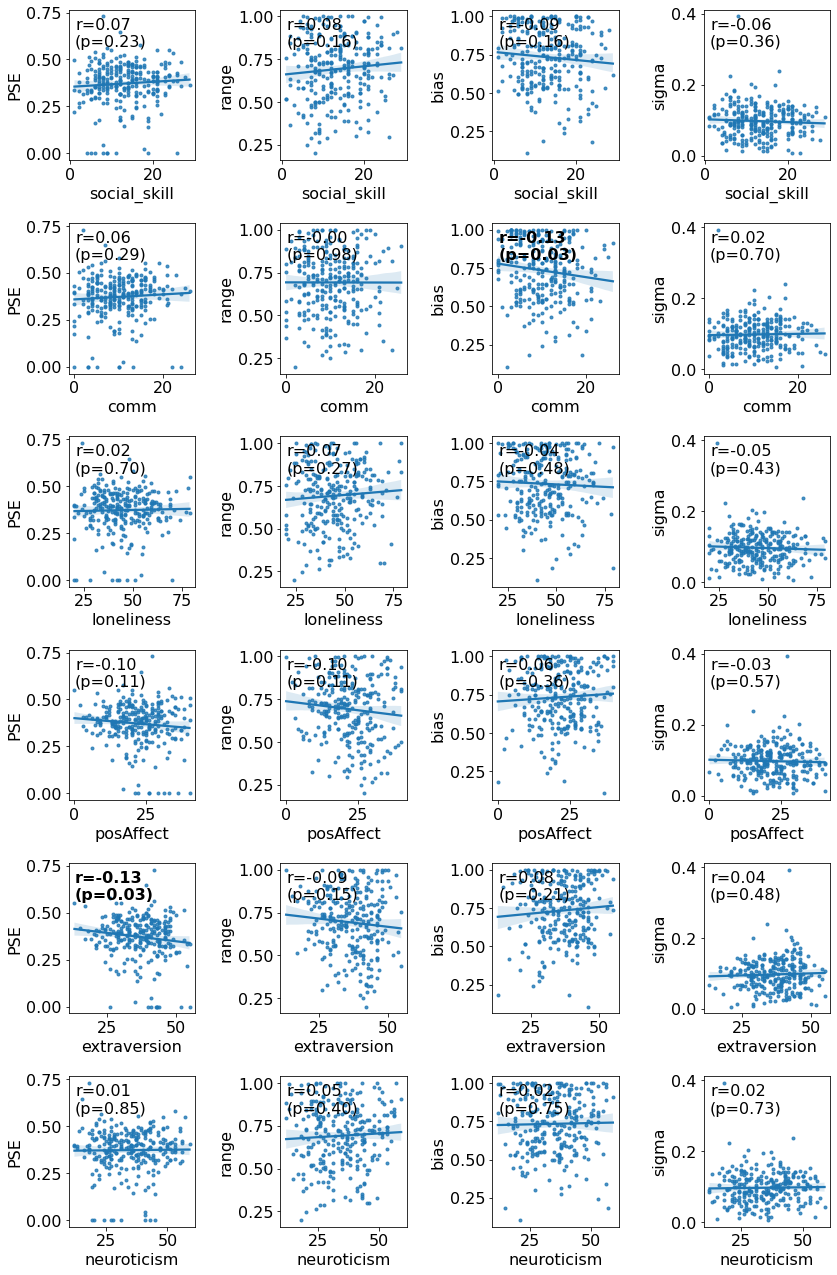

In [31]:
r_subt=np.full((len(relevant_traits),len(new_terms_subt)),np.nan)
p_subt=np.full((len(relevant_traits),len(new_terms_subt)),np.nan)
fig,axs = plt.subplots(ncols=len(new_terms_subt),nrows=len(relevant_traits),figsize=(3*len(new_terms_subt),3*len(relevant_traits)))#,sharex=True)
for i,trait in enumerate(relevant_traits):
    for j,param in enumerate(new_terms_subt):
        param = param + '_subt'
        ax = axs[i,j]
        sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.', color = 'tab:blue')
        ax.set_ylabel('_'.join(param.split('_')[:-1]))
        x,y = df[trait], df[param]
        rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
        x = x[rows]
        y = y[rows]
        x = x[rows]
        y = y[rows]
        r,p = pearsonr(x,y)
        r_subt[i,j],p_subt[i,j] = r,p
        if p < .05:
            color = 'k'
            fontweight = 'bold'
        else:
            color = 'k'
            fontweight = 'normal'
        ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color, fontweight = fontweight, ha='left',va='top')
        # ax.set_title(f'PC{i+1}')
plt.tight_layout()
plt.savefig(f'{results_rootfile}/selectedtraits_vs_curvefit_params_subtlety.png')

In [32]:
from multipy.fdr import lsu
# Flatten the 2D array to 1D
p_subt_flattened = p_subt.flatten()

# Apply the lsu correction
corrected_p_values_flattened_subt = lsu(p_subt_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values_subt = corrected_p_values_flattened_subt.reshape(p_subt.shape)

print(corrected_p_values_subt)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


In [33]:
results_rootfile

'../../results/subtlety_playfight_mixed/trait-beh_pflinear/'

In [34]:
new_terms_pf

['PSE', 'slope', 'bias']

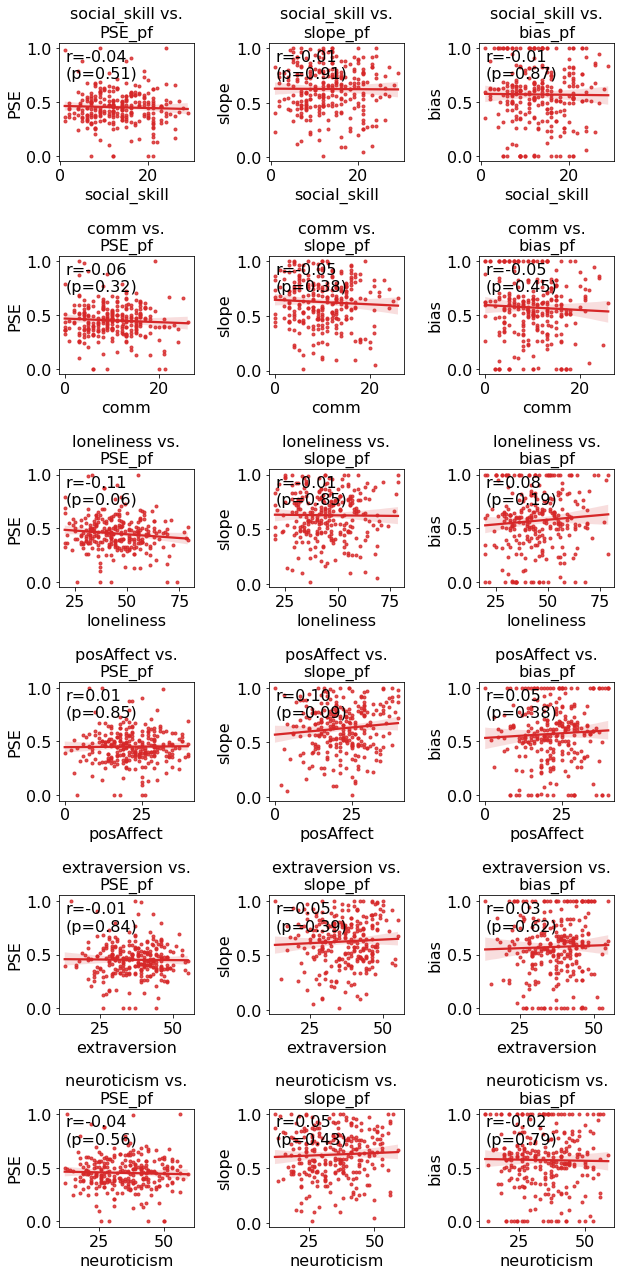

In [35]:
r_pf=np.full((len(relevant_traits),len(new_terms_pf)),np.nan)
p_pf=np.full((len(relevant_traits),len(new_terms_pf)),np.nan)
fig,axs = plt.subplots(ncols=len(new_terms_pf),nrows=len(relevant_traits),figsize=(3*len(new_terms_pf),3*len(relevant_traits)))#,sharex=True)
for i,trait in enumerate(relevant_traits):
    for j,param in enumerate(new_terms_pf):
        if '_pf' not in param:
            param = param + '_pf'
        ax = axs[i,j]
        sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.',color = 'tab:red')
        ax.set_ylabel('_'.join(param.split('_')[:-1]))
        x,y = df[trait], df[param]
        rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
        x = x[rows]
        y = y[rows]
        r,p = pearsonr(x,y)
        r_pf[i,j],p_pf[i,j] = r,p
        if p < .05:
            color = 'k'
            fontweight = 'bold'
        else:
            color = 'k'
            fontweight = 'normal'
        ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color,fontweight = fontweight,ha='left',va='top')
        ax.set_title(f'{trait} vs.\n{param}')
plt.tight_layout()
plt.savefig(f'{results_rootfile}selectedtraits_vs_curvefit_params_pflinear.png')

In [37]:
# Flatten the 2D array to 1D
p_pf_flattened = p_pf.flatten()

# Apply the lsu correction
corrected_p_values_flattened_pf = lsu(p_pf_flattened)

# Reshape the corrected p-values back to the original 2D shape
corrected_p_values_pf = corrected_p_values_flattened_pf.reshape(p_pf.shape)

print(corrected_p_values_pf)

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]


# diff plots (scrapped)

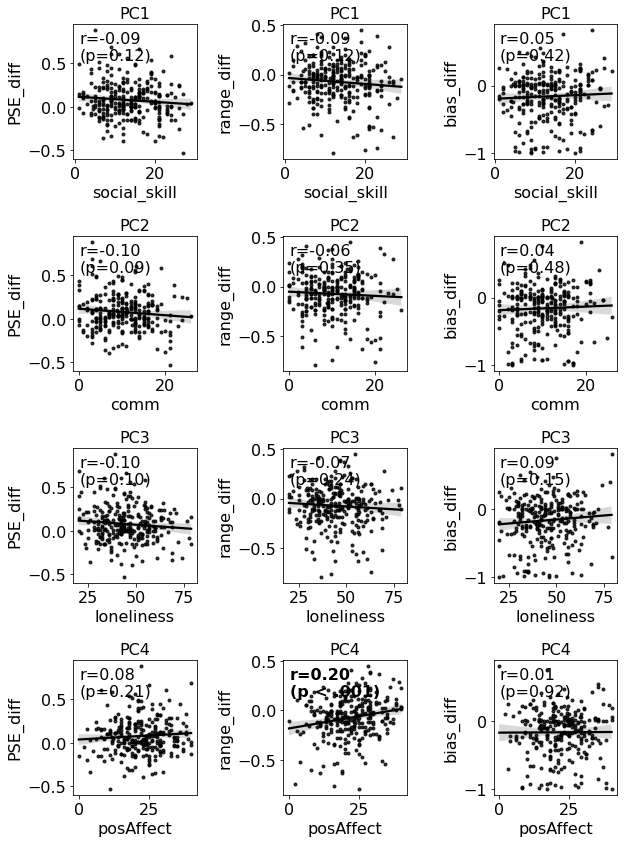

In [95]:
# r_diff=np.full((len(relevant_traits),len(new_params)),np.nan)
# p_diff=np.full((len(relevant_traits),len(new_params)),np.nan)
# fig,axs = plt.subplots(ncols=len(new_params),nrows=len(relevant_traits),figsize=(3*len(new_params),3*len(relevant_traits)))#,sharex=True)
# for i,trait in enumerate(relevant_traits):
#     for j,param in enumerate(new_params):
#         # param = param + '_diff'
#         ax = axs[i,j]
#         sns.regplot(data=df, x=trait, y = param,ax=ax, marker='.', color = 'k')
#         ax.set_ylabel('_'.join(param.split('_')))
#         x,y = df[trait], df[param]
#         rows = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y))
#         x = x[rows]
#         y = y[rows]
#         r,p = pearsonr(x,y)
#         r_diff[i,j],p_diff[i,j] = r,p
#         if p < .05:
#             color = 'k'
#             fontweight = 'bold'
#         else:
#             color = 'k'
#             fontweight = 'normal'
#         ax.annotate(f'r={r:.2f}\n({get_p(p)})',xy=(0.05,.95),xycoords='axes fraction', color = color,fontweight = fontweight, ha='left',va='top')
#         ax.set_title(f'PC{i+1}')
# plt.tight_layout()
# plt.savefig(f'{results_rootfile}/selectedtraits_vs_curvefit_params_pf-subt_linear.png')

In [96]:
# # Flatten the 2D array to 1D
# p_diff_flattened = p_diff.flatten()

# # Apply the lsu correction
# corrected_p_values_flattened_p_diff = lsu(p_diff_flattened)

# # Reshape the corrected p-values back to the original 2D shape
# corrected_p_values_diff = corrected_p_values_flattened_p_diff.reshape(p_diff.shape)

# print(corrected_p_values_diff)

[[False False False]
 [False False False]
 [False False False]
 [False  True False]]
